<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/Sample_distributions_mean_median_std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sample Distributions

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
x = np.array([1,4.1,3,2,6,5.2,7])
x

array([1. , 4.1, 3. , 2. , 6. , 5.2, 7. ])

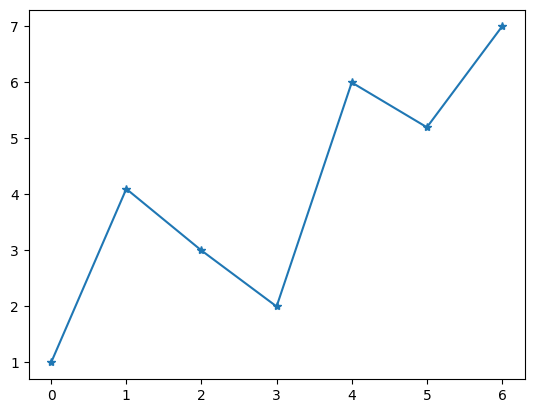

In [3]:
plt.plot(x,'-*')

In [4]:
%%latex
\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}

<IPython.core.display.Latex object>

In [5]:
# mean of the array x
xmean = np.sum(x)/len(x)
xmean

np.float64(4.042857142857143)

In [6]:
# mean of the array x
np.mean(x)

np.float64(4.042857142857143)

Text(0, 0.5, 'Anomalies')

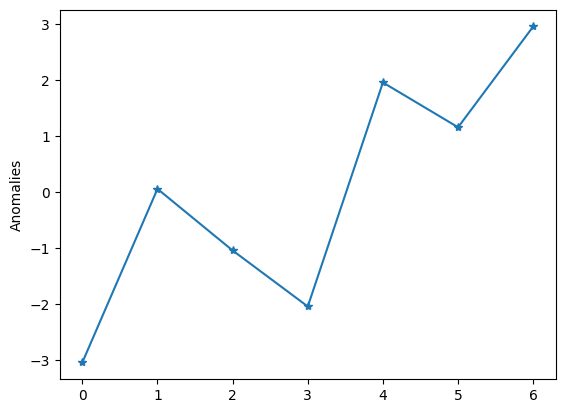

In [8]:
plt.plot(x-xmean,'-*')
plt.ylabel('Anomalies')

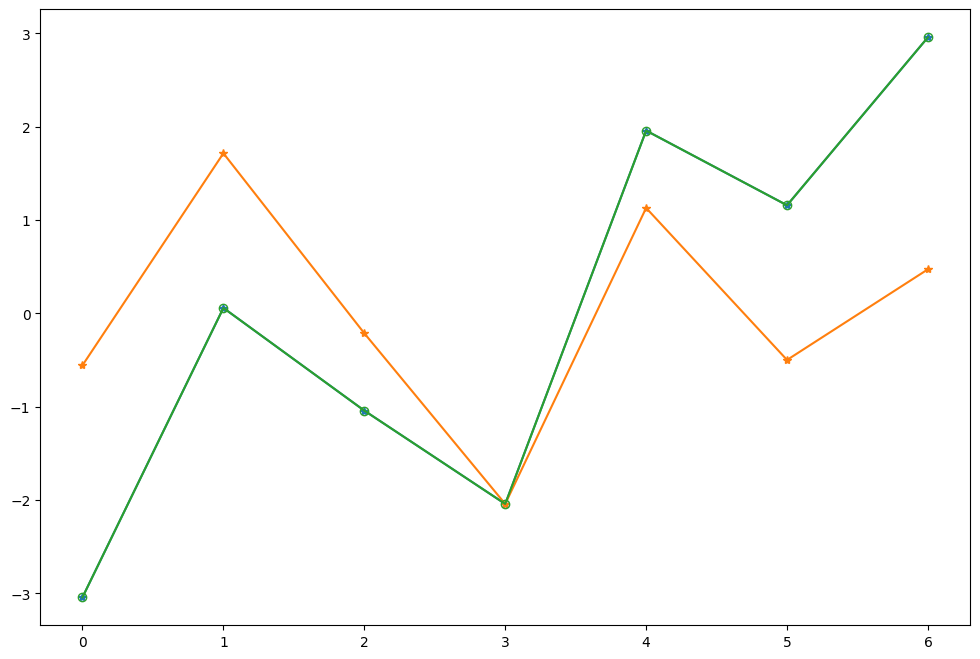

In [28]:
from scipy.signal import detrend
x_d_const = detrend(x, type='constant')
x_d_linear = detrend(x, type='linear')
plt.figure(figsize=(12,8))
plt.plot(x_d_const,'-*')
plt.plot(x_d_linear,'-*')
plt.plot(x-xmean,'-o',mfc='none')

In [29]:
# median of the array x
np.median(x)

np.float64(4.1)

In [30]:
# The median of an array of size n is defined as the middle element
# when n is odd and the average of the middle two elements when n is even.
np.sort(x)

array([1. , 2. , 3. , 4.1, 5.2, 6. , 7. ])

In [12]:
def findMedian(arr):
    n = len(arr)

    # First we sort the array
    arr.sort()

    # check for even case
    if n % 2 != 0:
        return arr[n // 2]

    return (arr[(n - 1) // 2] + arr[n // 2]) / 2.0

In [13]:
xmedian = findMedian(x)
xmedian

np.float64(4.1)

In [15]:
np.median(x)

np.float64(4.1)

In [16]:
%%latex
s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}}

<IPython.core.display.Latex object>

In [17]:
# standard deviation
xstd = np.sqrt(np.sum((x - xmean)**2)/len(x-1))
xstd

np.float64(2.0155517804293286)

In [ ]:
np.std(x)

2.0155517804293286

In [37]:
def uniform_pdf_dice(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a+1), 0)

In [38]:
x = np.array([1,2,3,4,5,6])
y = uniform_pdf_dice(x, 1, 6)
y

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

<BarContainer object of 6 artists>

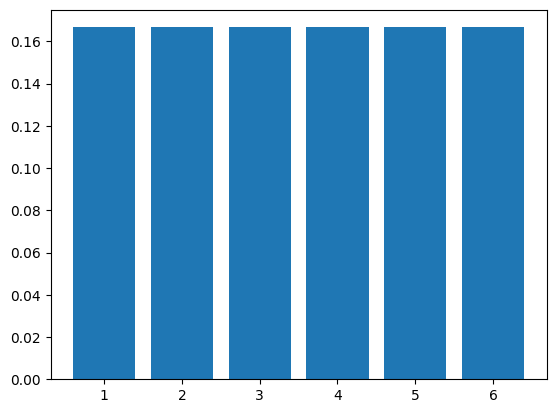

In [ ]:
plt.bar(x,y)

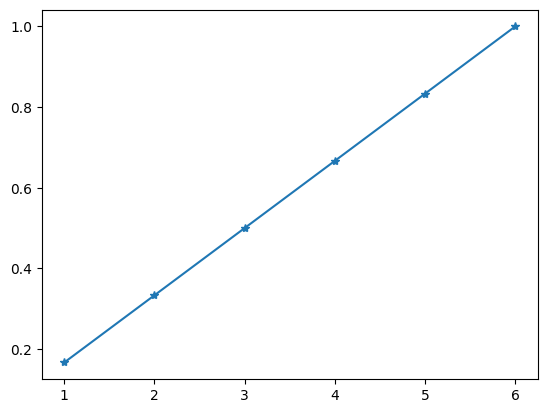

In [ ]:
plt.plot(x,1/len(x)*x,'-*')
plt.ylabel('Cumulative Distribution Function (CDF)')

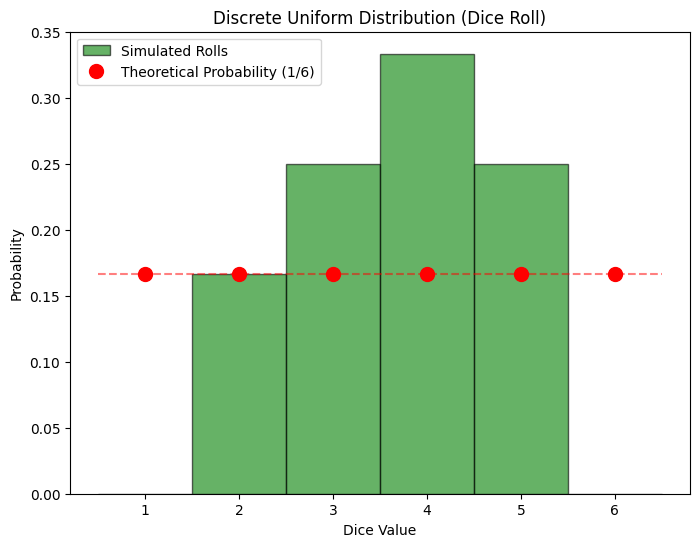

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate discrete random integers
# We use low=1, high=7 because the high limit is excluded in Python
samples = np.random.randint(low=1, high=7, size=12)

# 2. Setup the plot
plt.figure(figsize=(8, 6))

# 3. Create a histogram
# 'bins' are set to center the bars on the integers 1, 2, 3...
# np.arange(1, 8) - 0.5 creates bins: [0.5, 1.5, 2.5, ..., 6.5]
plt.hist(samples, bins=np.arange(1, 8) - 0.5, density=True,
         alpha=0.6, color='g', edgecolor='black', label='Simulated Rolls')

# 4. Plot the Theoretical Probability (PMF)
# For a fair die, P(x) = 1/6 for all x in {1,2,3,4,5,6}
x_theory = np.arange(1, 7)
y_theory = np.full_like(x_theory, 1/6, dtype=float)

# Use a stem plot or dots for discrete distributions
plt.plot(x_theory, y_theory, 'ro', markersize=10, label='Theoretical Probability (1/6)')
plt.hlines(1/6, 0.5, 6.5, colors='r', linestyles='dashed', alpha=0.5)

plt.xlabel('Dice Value')
plt.ylabel('Probability')
plt.title('Discrete Uniform Distribution (Dice Roll)')
plt.xticks(range(1, 7)) # Ensure only integers are on the x-axis
plt.legend()
plt.show()

In [43]:
samples

array([4, 3, 4, 4, 3, 4, 3, 2, 5, 5, 5, 2])

In [54]:
# Binomial Distribution
from scipy.stats import binom

n = 21 # number of toss
p = 0.5 # heads or tail

# Define the binomial distribution with n trials and probability p of success
binom_dist = binom(n, p)

# Calculate the probability of getting an even number of heads (0, 2, 4, ..., 20)
even_probs = binom_dist.pmf(range(0, n+1, 2))

# Print the probability of getting each even number of heads
for i, prob in enumerate(even_probs):
    print("The probability of getting {} heads in {} flips is {}".format(2*i,n,prob))

# Calculate the total
total_prob = sum(even_probs)
print("Total probability of getting even number of heads is {}".format(total_prob))

The probability of getting 0 heads in 21 flips is 4.768371582031256e-07
The probability of getting 2 heads in 21 flips is 0.0001001358032226562
The probability of getting 4 heads in 21 flips is 0.002853870391845703
The probability of getting 6 heads in 21 flips is 0.025875091552734385
The probability of getting 8 heads in 21 flips is 0.09703159332275395
The probability of getting 10 heads in 21 flips is 0.16818809509277355
The probability of getting 12 heads in 21 flips is 0.14015674591064464
The probability of getting 14 heads in 21 flips is 0.055446624755859236
The probability of getting 16 heads in 21 flips is 0.009703159332275378
The probability of getting 18 heads in 21 flips is 0.0006341934204101561
The probability of getting 20 heads in 21 flips is 1.0013580322265633e-05
Total probability of getting even number of heads is 0.5000000000000001


<BarContainer object of 11 artists>

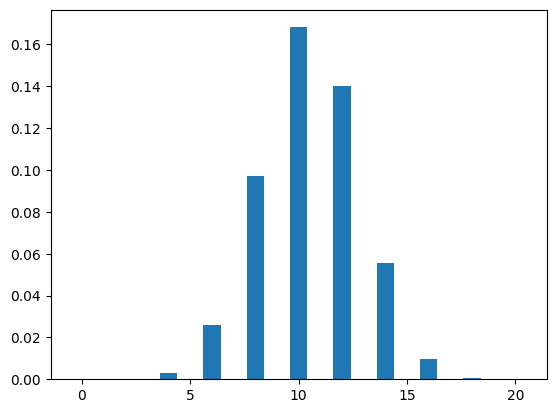

In [55]:
plt.bar(range(0, n+1, 2),even_probs)

In [57]:
binom_dist.pmf(10)

np.float64(0.16818809509277355)

<BarContainer object of 1001 artists>

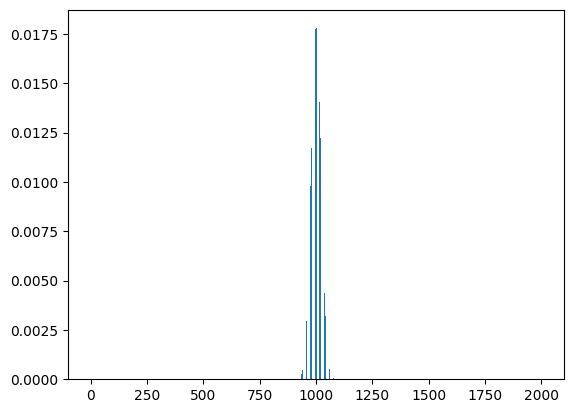

In [ ]:
n = 2001
p = 0.5
# Define the binomial distribution with n trials and probability p of success
binom_dist = binom(n, p)
# Calculate the probability of getting an even number of heads (0, 2, 4, ..., 20)
even_probs = binom_dist.pmf(range(0, n+1, 2))
plt.bar(range(0, n+1, 2),even_probs)

In [ ]:
# Binomial Distribution
from scipy.stats import binom

n = 21 # number of toss
p = 0.5 # heads or tail

# Define the binomial distribution with n trials and probability p of success
binom_dist = binom(n, p)
binom_dist

In [58]:
import xarray as xr

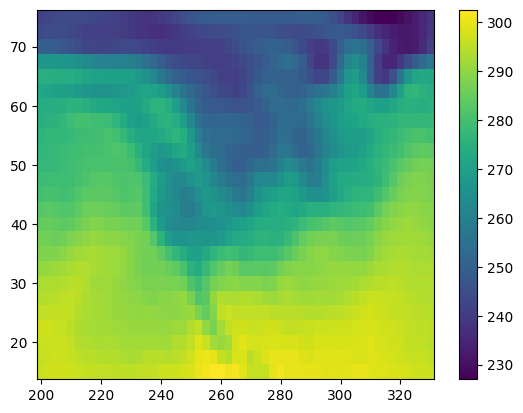

In [59]:
df = xr.tutorial.open_dataset("air_temperature")
plt.pcolormesh(df.lon,df.lat,df.air[0,:,:]);plt.colorbar()

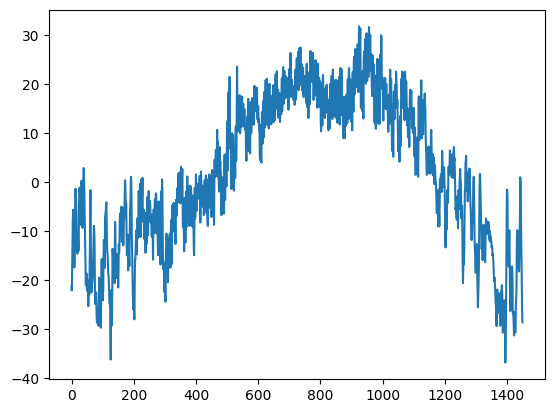

In [60]:
plt.plot(df.air[0:1450,10,25]-273.15)

(array([ 2.,  0.,  1.,  0.,  4., 12.,  7., 20., 22., 12., 23., 21., 19.,
        23., 20., 30., 35., 29., 40., 32., 54., 38., 53., 44., 43., 52.,
        37., 57., 33., 22., 31., 26., 15., 21., 39., 45., 35., 67., 61.,
        67., 52., 56., 59., 31., 20., 13., 11.,  4.,  9.,  3.]),
 array([-36.85 , -35.478, -34.106, -32.734, -31.362, -29.99 , -28.618,
        -27.246, -25.874, -24.502, -23.13 , -21.758, -20.386, -19.014,
        -17.642, -16.27 , -14.898, -13.526, -12.154, -10.782,  -9.41 ,
         -8.038,  -6.666,  -5.294,  -3.922,  -2.55 ,  -1.178,   0.194,
          1.566,   2.938,   4.31 ,   5.682,   7.054,   8.426,   9.798,
         11.17 ,  12.542,  13.914,  15.286,  16.658,  18.03 ,  19.402,
         20.774,  22.146,  23.518,  24.89 ,  26.262,  27.634,  29.006,
         30.378,  31.75 ]),
 <BarContainer object of 50 artists>)

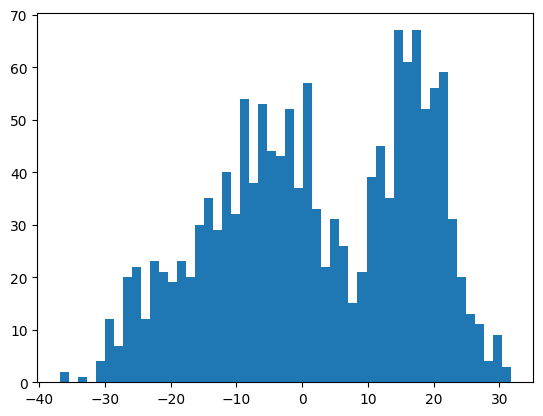

In [61]:
Tair = df.air[0:1450,10,25]-273.15
plt.hist(Tair, bins=50)

In [62]:
ds = xr.tutorial.open_dataset("ersstv5")
ds

<xarray.Dataset> Size: 40MB
Dimensions:    (time: 624, nbnds: 2, lat: 89, lon: 180)
Coordinates:
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 10kB ...
    sst        (time, lat, lon) float32 40MB ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

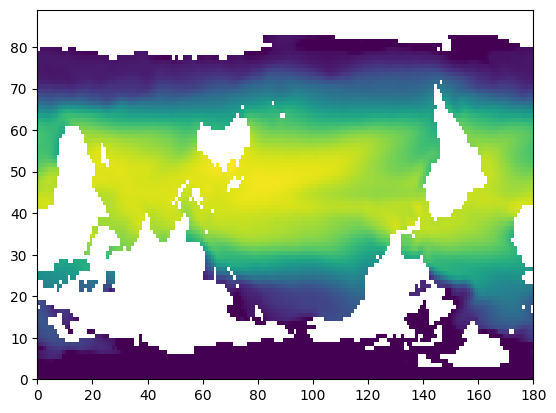

In [63]:
plt.pcolormesh(ds.sst[0,:,:])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
         0.,  1.,  0.,  3.,  0.,  0.,  3.,  1.,  3.,  0.,  1.,  0.,  3.,
         0.,  1.,  3.,  2.,  3.,  2.,  0.,  0.,  4.,  2.,  3.,  3.,  1.,
         2.,  4.,  3.,  3.,  3.,  3.,  2.,  9.,  2.,  2.,  3.,  2.,  3.,
         4.,  4.,  3.,  3.,  1.,  6.,  4.,  5.,  4.,  5.,  4.,  4.,  5.,
         5.,  2.,  4.,  3.,  2.,  5.,  5.,  5.,  8.,  7.,  2.,  9.,  7.,
         6.,  6.,  3.,  6.,  2.,  6.,  6.,  5.,  7.,  4.,  6.,  2.,  3.,
         8.,  5.,  3.,  4.,  3.,  5.,  4.,  7.,  8.,  2.,  9.,  8.,  5.,
         5.,  4.,  3.,  8., 10., 10.,  5.,  5.,  2.,  2.,  5.,  6.,  1.,
         4.,  7.,  6.,  4.,  4.,  2.,  0.,  2.,  2.,  3.,  4.,  7.,  4.,
         1.,  6.,  3., 10.,  3.,  5.,  2.,  4.,  5.,  4.,  5.,  3.,  2.,
         4.,  4.,  7.,  4.,  7.,  4.,  4.,  1.,  5.

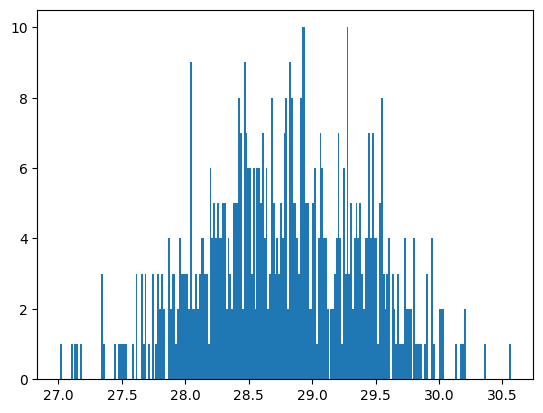

In [ ]:
plt.hist(ds.sst[:,50,100], bins=250)